In [35]:
from rdkit import Chem
from rdkit.Chem import Descriptors #musim to importovat takto, nedokazu se dostat k Chem.Descriptors normalni teckovou notaci
from rdkit.Chem import rdMolDescriptors as rDescriptors
from rdkit.Chem.Draw import IPythonConsole
#from rdkit.Chem import AllChem as Chem, potom bychom nemuseli importovat Descriptor 

# from rdkit import RDLogger #to kdybych nechtel horu chybovych hlasek
# lg = RDLogger.logger()
# lg.setLevel(RDLogger.CRITICAL)

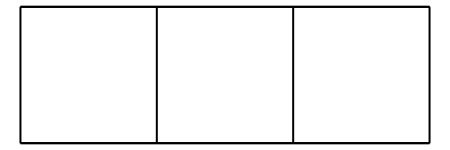

In [38]:
suppl = Chem.SDMolSupplier('../../data/drugbank.sdf') #vrati nam to generator
cubane = Chem.MolFromSmiles('C12C3C4C1C5C2C3C45')
cubane

In [ ]:
molecules = [mol for mol in suppl if mol] #if mol je tam proto, ze v tom drugbanku jsou nejaky None a ty dal nechceme
rings = []
for molecule in molecules:
    ring = Chem.GetSSSR(molecule)
    rings.append(ring)

print(len(rings))
print(sum(rings)/len(rings))

7115
2.4687280393534787


In [ ]:
weights = []
for molecule in molecules:
    weight = rDescriptors.CalcExactMolWt(molecule) #nebo Descriptors.MolWt
    weights.append(weight)

print(sum(weights)/len(weights))

356.13029771820175


In [41]:
lipinski = []
for molecule in molecules:
    rules = [False, False, False, False]
    if Chem.Lipinski.NumHAcceptors(molecule) <= 10:
        rules[0] = True
    if Chem.Lipinski.NumHDonors(molecule) <= 5:
        rules[1] = True 
    if Descriptors.MolWt(molecule) < 500:
        rules[2] = True
    if Chem.Crippen.MolLogP(molecule) <= 5:
        rules[3] = True
    if rules.count(True) >= 3:
        lipinski.append(molecule) 

6380
0.8966971187631764


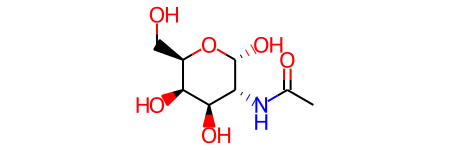

In [48]:
print(len(lipinski))
print(len(lipinski)/len(molecules))
lipinski[2740]